### Задание 1

* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

#### 1.1. Скачать данные по ссылке

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 1.2 Изучить стоимости недвижимости

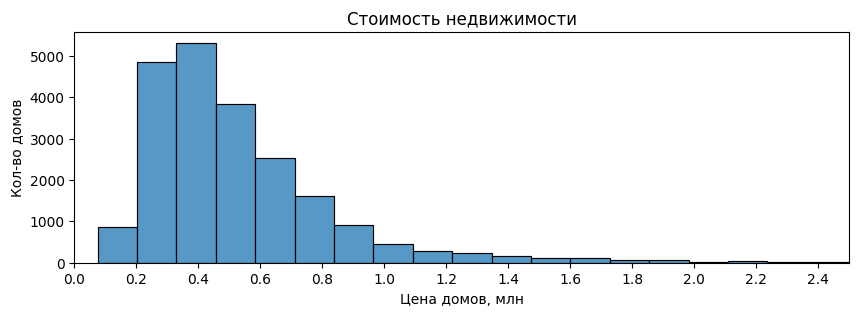

In [3]:
df['price, mln.'] = df['price'] / 1000000

plt.figure(figsize = (10, 3))

sns.histplot(df['price, mln.'], bins = 60)

plt.title('Стоимость недвижимости')
plt.xlabel('Цена домов, млн')
plt.ylabel('Кол-во домов')
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6])
plt.xlim([0.0, 2.5])
pass

Для удобства работы добавим столбик с ценой, выражающейся в миллионах в валюте датасета (не указана).
Пробное построение графика показало наличие выбросов по цене впллоть до 8 млн в валюте.
Для ещё большего удобства ограничим отображение данных по оси х (цена домов, млн) максимумом в 3,5 млн.

Основное количество недвижимости представлено в ценовом диапазоне от 200 тыс. до 800 тыс. в валюте датасета.

#### 1.3 Изучить распределение квадратуры жилой

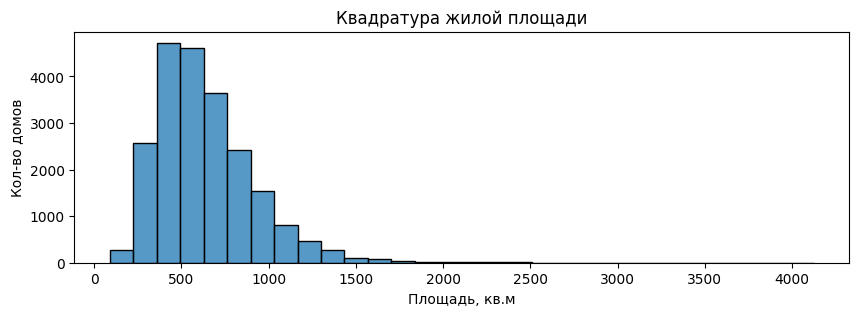

In [4]:
df['sqmeter_living'] = df['sqft_living'] / 3.281

plt.figure(figsize = (10, 3))

sns.histplot(df['sqmeter_living'], bins = 30)

plt.title('Квадратура жилой площади')
plt.xlabel('Площадь, кв.м')
plt.ylabel('Кол-во домов')
pass

In [5]:
df['sqml_range'] = '6. >= 1400'
df.loc[df['sqmeter_living'] < 1400, 'sqml_range'] = '5. 1100 - 1400'
df.loc[df['sqmeter_living'] < 1100, 'sqml_range'] = '4. 800 - 1100'
df.loc[df['sqmeter_living'] < 800, 'sqml_range'] = '3. 500 - 800'
df.loc[df['sqmeter_living'] < 500, 'sqml_range'] = '2. 200 - 500'
df.loc[df['sqmeter_living'] < 200, 'sqml_range'] = '1. < 200'

df['built_range'] = '6. >= 2000'
df.loc[df['yr_built'] < 2000, 'built_range'] = '5. 1980 - 2000'
df.loc[df['yr_built'] < 1980, 'built_range'] = '4. 1960 - 1980'
df.loc[df['yr_built'] < 1960, 'built_range'] = '3. 1940 - 1960'
df.loc[df['yr_built'] < 1940, 'built_range'] = '2. 1920 - 1940'
df.loc[df['yr_built'] < 1920, 'built_range'] = '1. < 1920'

sqmeterStacked = pd.crosstab(df['built_range'], df['sqml_range'], normalize = 'index').reset_index()
sqmeterStacked.head()

sqml_range,built_range,1. < 200,2. 200 - 500,3. 500 - 800,4. 800 - 1100,5. 1100 - 1400,6. >= 1400
0,1. < 1920,0.010338,0.509993,0.343212,0.106134,0.016540,0.013784
1,2. 1920 - 1940,0.014518,0.495935,0.361208,0.094657,0.029036,0.004646
2,3. 1940 - 1960,0.008302,0.565939,0.335152,0.072818,0.013520,0.004269
3,4. 1960 - 1980,0.001416,0.326795,0.497472,0.139130,0.028918,0.006269
4,5. 1980 - 2000,0.000221,0.222788,0.473009,0.214823,0.067699,0.021460


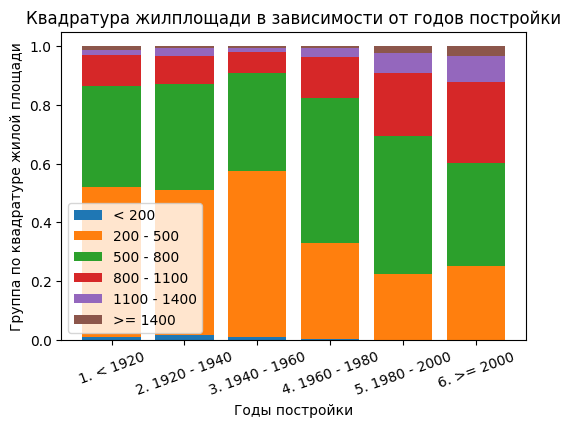

In [6]:
plt.figure(figsize = (6, 4))

x_0 = sqmeterStacked['built_range']
y_1 = sqmeterStacked['1. < 200']
y_2 = sqmeterStacked['2. 200 - 500']
y_3 = sqmeterStacked['3. 500 - 800']
y_4 = sqmeterStacked['4. 800 - 1100']
y_5 = sqmeterStacked['5. 1100 - 1400']
y_6 = sqmeterStacked['6. >= 1400']

plt.bar(x_0, y_1)
plt.bar(x_0, y_2, bottom = y_1)
plt.bar(x_0, y_3, bottom = (y_1 + y_2))
plt.bar(x_0, y_4, bottom = (y_1 + y_2 + y_3))
plt.bar(x_0, y_5, bottom = (y_1 + y_2 + y_3 + y_4))
plt.bar(x_0, y_6, bottom = (y_1 + y_2 + y_3 + y_4 + y_5))

plt.title('Квадратура жилплощади в зависимости от годов постройки')
plt.xlabel('Годы постройки')
plt.ylabel('Группа по квадратуре жилой площади')
plt.legend(['< 200', '200 - 500', '500 - 800', '800 - 1100', '1100 - 1400', '>= 1400'])
plt.xticks(rotation = 20)
pass

Судя по названию признака sqft_living данные по квадратуре недвижимости заданы в квадратных футах.
Для простоты восприятия информации переведём квадратные футы в более привычные квадратные метры.

В данных присутствуют выбросы.

Основные продажи приходятся на дома с квадратурой жилой площади от 200 до 1100 кв. м.
Причём начиная с 60-х годов постройки резко снижается доля домов до 500 кв. м и неуклонно растёт доля домов с квадратурой более 1100 кв. м, что может говорить о том, что текущий результат по продажам обусловен скорее предложением на рынке недвижимости, нежели реальным спросом, который как раз, начиная со второй половины 20-го века влияет на строительную индустрию.

#### 1.4 Изучить распределение года постройки

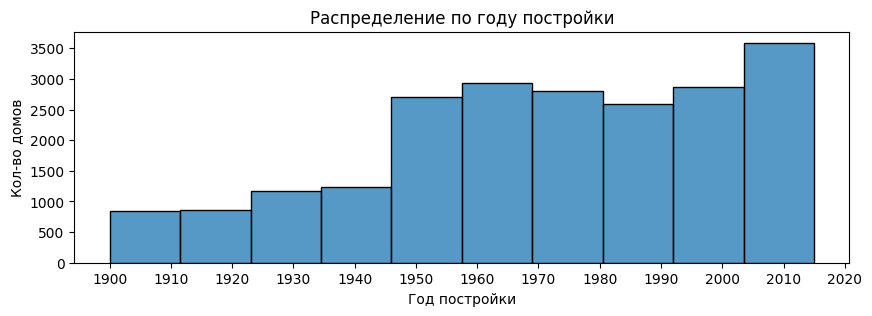

In [7]:
plt.figure(figsize = (10, 3))

sns.histplot(df['yr_built'], bins = 10)

plt.title('Распределение по году постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во домов')
plt.xticks([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
pass

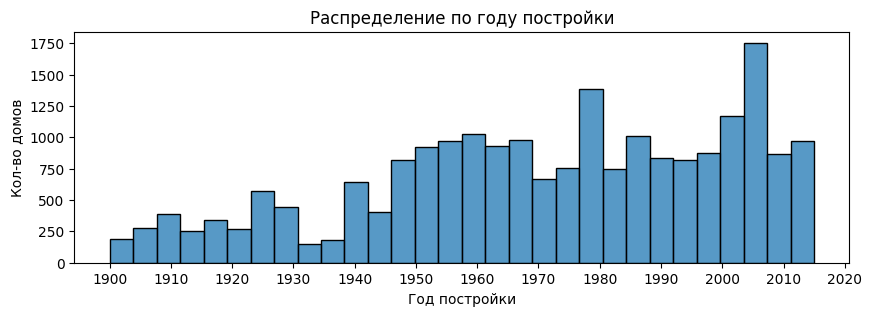

In [8]:
plt.figure(figsize = (10, 3))

sns.histplot(df['yr_built'], bins = 30)

plt.title('Распределение по году постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во домов')
plt.xticks([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
pass

Данный датасет охватывает временной интервал от 1900 до середины 2010х.

В целом темпы строительства следуют позитивному тренду от начала периода наблюдений и до момента, когда наблюдения в данном датасете прекращаются. Однако вместе с этим можно отметить проседания 30х-40х годах, а также в начале 70х. При этом можно выделить два явных пика в конце 70х и в середине 00х, что возможно является проявлением "отложенного" спроса, простимулировавшего строительство после предшествующих кризисов, но это предположение требует дополнительных исследований и не может быть подтверждено или опровергнуто в рамках данного датасета.

### Задание 2

#### 2.1 Изучить распределение домов от наличия вида на набережную
* Постройте график
* Сделайте выводы

In [9]:
embankment = df['waterfront'].value_counts()
embankment.index = ['no', 'yes']
embankment.head()

no     21450
yes      163
Name: waterfront, dtype: int64

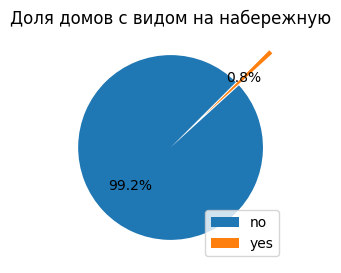

In [10]:
plt.figure(figsize = (5, 3))

plt.pie(embankment, autopct = '%1.1f%%', explode = [0, 0.5], startangle = 45)

plt.title('Доля домов с видом на набережную')
plt.legend(embankment.index, loc = 'lower right')
pass

Поскольку вид на набережную - это бинарный признак (либо вид есть, либо его нет), то удобнее всего изучить такую характеристику с помощью пайчарта.

По графику видно, что подавляющее большинство домов в датасете не имеют вида на набережную.

#### 2.2 Изучить распределение этажей домов

In [11]:
floorsdata = df['floors'].value_counts().sort_index()
floorsdata

1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
Name: floors, dtype: int64

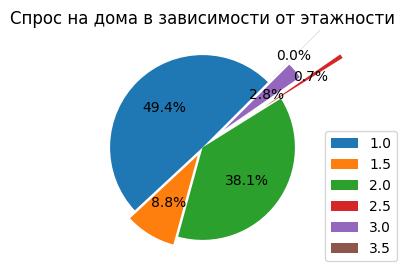

In [12]:
plt.figure(figsize = (5, 3))

plt.pie(floorsdata,
        autopct = '%1.1f%%',
        explode = [0, 0.1, 0, 0.8, 0.3, 0.8],
        startangle = 45)

plt.title('Спрос на дома в зависимости от этажности')
plt.legend(floorsdata.index, bbox_to_anchor = (1, 0.6))
pass

Дома в датасете имеют от одного до трёх с половиной этажей, с шагом в пол-этажа, что вероятно означает наличие чердака или мансарды, однако это не представляется возможным проверить исходя из данных датасета.

Почти половина домов продаётся в одноэтажном сегменте.
Второе место по объёму продаж принадлежит домам с двумя этажами.
Суммарно эти две категории составляют почти 90% от всех домов в датасете.

При этом более 95% проданных домов имеют этажность не более двух этажей.

#### 2.3 Изучить распределение состояния домов

In [13]:
conddata = df['condition'].value_counts().sort_index()
conddata

1       30
2      172
3    14031
4     5679
5     1701
Name: condition, dtype: int64

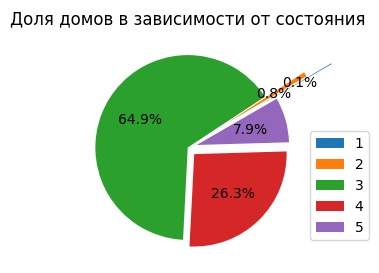

In [14]:
plt.figure(figsize = (5, 3))

plt.pie(conddata,
        autopct = '%1.1f%%',
        explode = [0.8, 0.5, 0, 0.1, 0.1],
        startangle = 30)

plt.title('Доля домов в зависимости от состояния')
plt.legend(conddata.index, bbox_to_anchor = (1, 0.6))
pass

Почти две трети продаж приходится на дома в среднем состоянии (3).
При этом дома в плохом (2) и очень плохом (1) состоянии либо очень плохо продаются (менее 1% всех продаж), либо мало представлены на рынке.

### Задание 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [15]:
price_correlation = df.drop(columns = ['id', 'date', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront',
                                       'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode',
                                       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price, mln.',
                                       'sqml_range', 'built_range'])

corr_matrix = price_correlation.corr()
corr_matrix = np.round(corr_matrix, 1) # будет округлять точность до 1 знака после запятой
corr_matrix[np.abs(corr_matrix) < 0.3] = 0 # уберём слабые корреляции
corr_matrix

,price,bedrooms,floors,view,condition,grade,yr_built,sqmeter_living
price,1.0,0.3,0.3,0.4,0.0,0.7,0.0,0.7
bedrooms,0.3,1.0,0.0,0.0,0.0,0.4,0.0,0.6
floors,0.3,0.0,1.0,0.0,-0.3,0.5,0.5,0.4
view,0.4,0.0,0.0,1.0,0.0,0.3,0.0,0.3
condition,0.0,0.0,-0.3,0.0,1.0,0.0,-0.4,0.0
grade,0.7,0.4,0.5,0.3,0.0,1.0,0.4,0.8
yr_built,0.0,0.0,0.5,0.0,-0.4,0.4,1.0,0.3
sqmeter_living,0.7,0.6,0.4,0.3,0.0,0.8,0.3,1.0


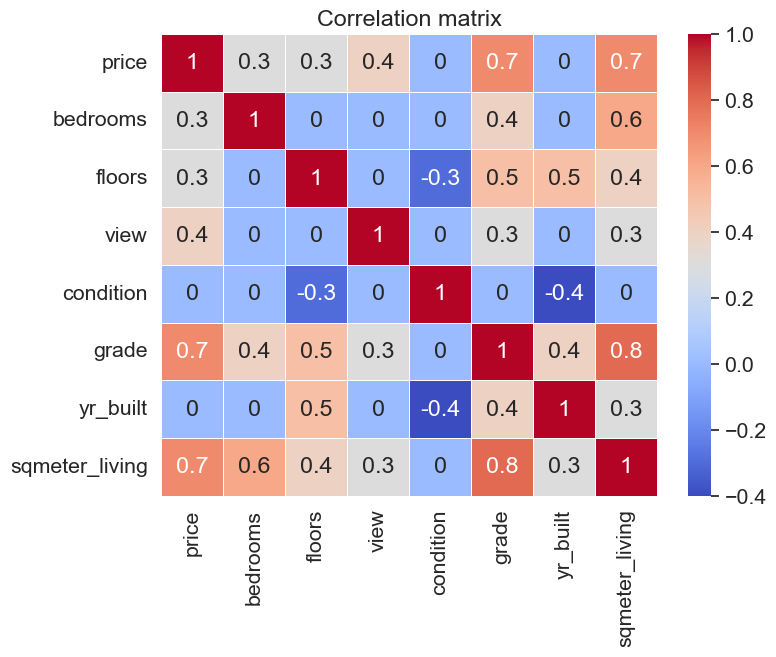

In [16]:
plt.figure(figsize = (8, 6))

sns.set(font_scale = 1.4)

sns.heatmap(corr_matrix, annot = True, linewidths = .5, cmap = 'coolwarm')

plt.title('Correlation matrix')
pass

Исходя из матрицы корреляции можно сделать вывод, что цена на недвижимость будет иметь прямую линейную зависимость от грейда и квадратуры жилой площади, и совсем не будет иметь корреляции с состоянием дома и годом постройки. Линейная зависимость цены от вида из окна, количества этажей и спален выражена слабо.

Для дальнейшего анализа убедимся в найденных линейных зависимостях, а также, помня о том, что зависимость может быть не только линейной, проверим наличие других видов зависимостей цены от других показателей.

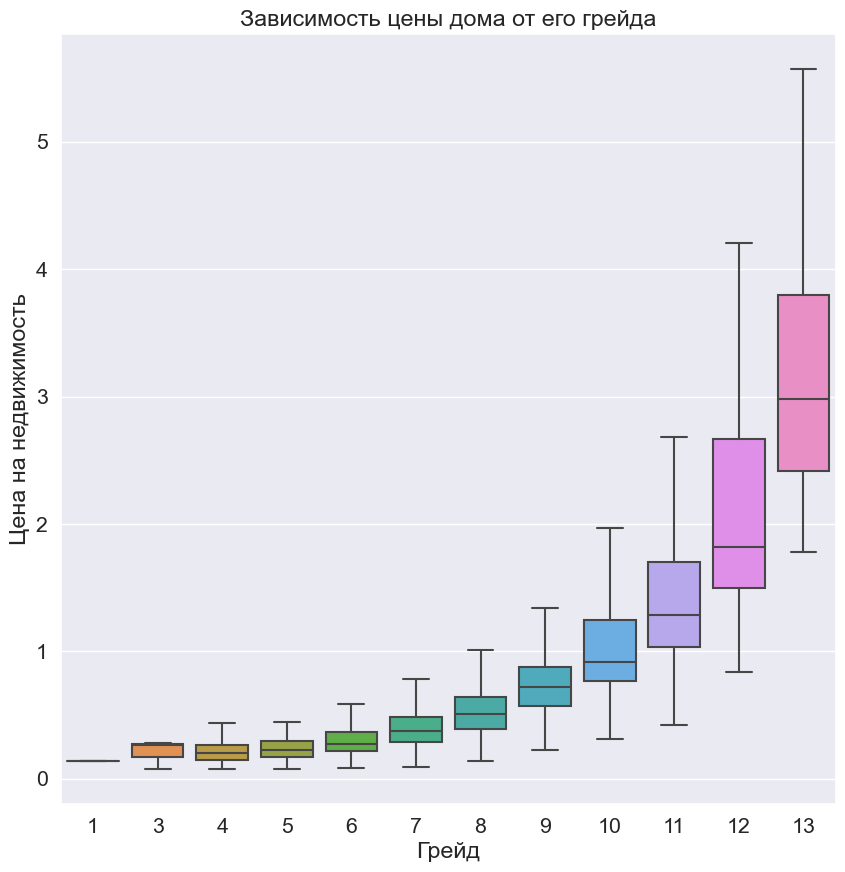

In [17]:
plt.figure(figsize = (10, 10))

sns.boxplot(x = df['grade'], y = df['price, mln.'], whis = 1.5, showfliers = False)

plt.xlabel('Грейд')
plt.ylabel('Цена на недвижимость')
plt.title('Зависимость цены дома от его грейда')
pass

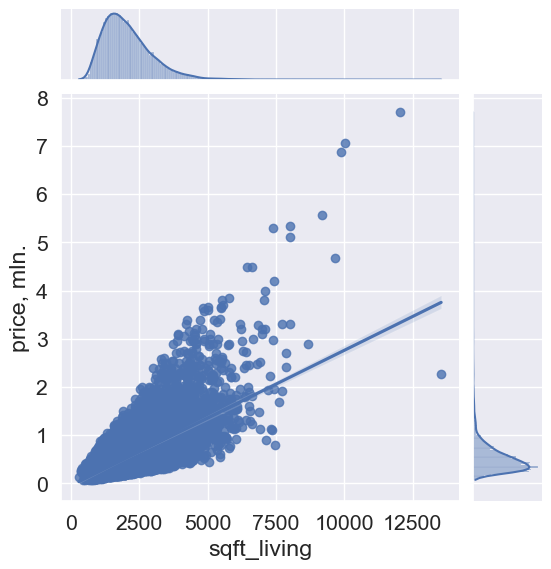

In [18]:
sns.jointplot(x = df['sqft_living'], y = df['price, mln.'], kind = 'reg')
pass

Проанализировав эти два графика мы убедились в прямой линейной зависимости между ценой недвижимости и квадратурой жилой площади, в то время как при оценке зависимости цены дома от его грейда речь идёт скорее об экспоненциальной зависимости.

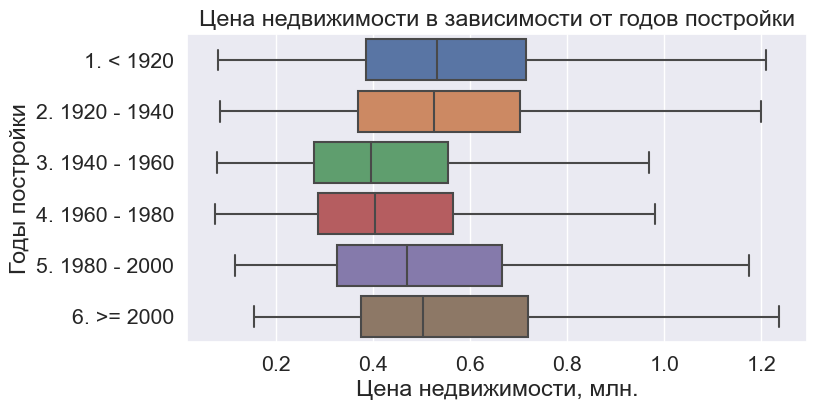

In [19]:
plt.figure(figsize = (8, 4))

sns.boxplot(x = df['price, mln.'], y = df['built_range'].sort_values(), whis = 1.5, showfliers = False)

plt.xlabel('Цена недвижимости, млн.')
plt.ylabel('Годы постройки')
plt.title('Цена недвижимости в зависимости от годов постройки')
pass

Наименьшей стоимостью обладают дома, построенные в промежутке между 1940 и 1980 годами, не смотря на то, что, как мы помним, начиная с 60-х годов резко снижается доля построенных домов с квадратурой до 500 кв. м и начинает расти доля домов с квадратурой более 800 кв. м, а как мы только что выяснили, от этой величиной цена на недвижимость зависит линейно. Это означает, что в данном случае на ценообразование влияет какой-то другой, более важный фактор, например, дома после 1980го года постройки стоят дороже за счёт новизны, а дома до 1940го года постройки стоят дороже за счёт своей исторической ценности.

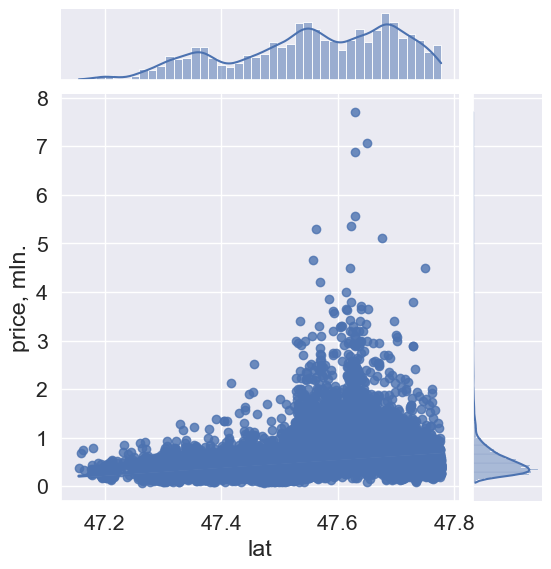

In [20]:
sns.jointplot(x = df['lat'], y = df['price, mln.'], kind = 'reg')
pass

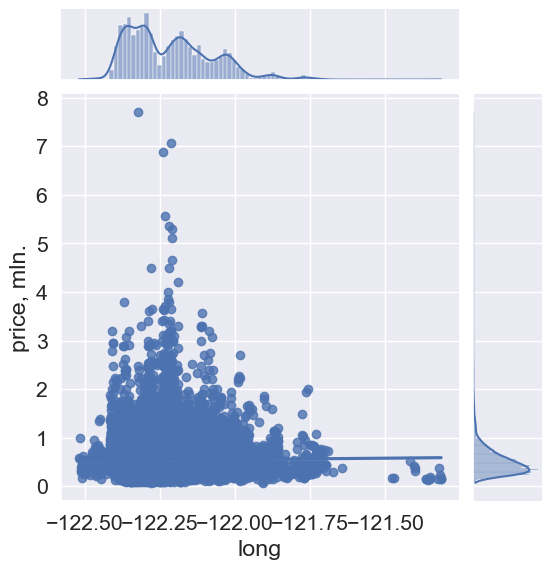

In [21]:
sns.jointplot(x = df['long'], y = df['price, mln.'], kind = 'reg')
pass

На графиках зависимости стоимости недвидимости от её географических координат прослеживается зависимость как от широты, так и от долготы, что вероятно говорит о наличии более и менее престижных районов проживания.

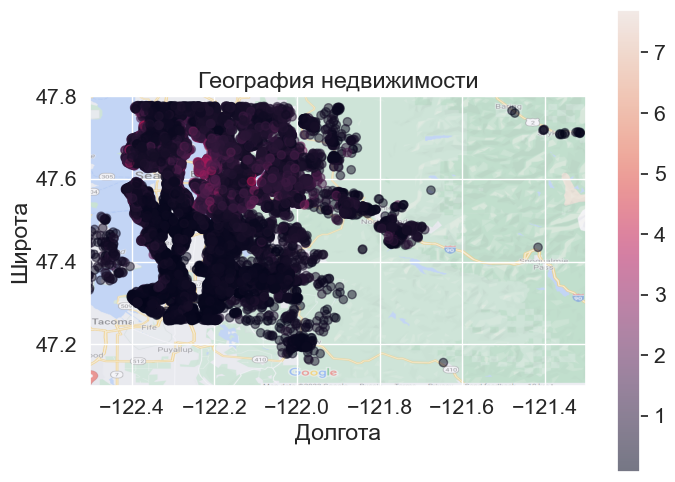

In [22]:
min_long = -122.5
max_long = -121.3

min_lat = 47.1
max_lat = 47.8

import matplotlib.image as img
seattle_map = img.imread('Map.PNG')

plt.figure(figsize = (8, 6))
sc = plt.scatter(df['long'], df['lat'], alpha = 0.5, c = df['price, mln.'])
plt.imshow(seattle_map, extent = [min_long, max_long, min_lat, max_lat], alpha = 0.5)

plt.colorbar(sc)
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.title("География недвижимости")
pass

Судя по карте, наиболее дорогая недвижимость продаётся в районах Сиэтла: West Seattle, Georgetown и Magnolia, в то время как более демократичную по цене недвижимость можно приобрести в соседнем городке Бельвью.

#### Итог

Основные факторы, влияющие на цену на недвижимость, это:
1. Грейд недвижимости
2. Квадратура жилой площади
3. Географическое расположение
4. Год постройки